<a href="https://colab.research.google.com/github/deivisongithub/Aprendizado-de-Maquina/blob/main/Trabalho_ML_2_deivison_dayane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#  <font color=cyan> 💻 Projeto Final da Disciplina Aprendizagem de Máquina

---



---



*   👦🏻 Deivison Rodrigues Jordão - 20200023728
*   👧🏻 Dayane Freitas Felipe Ramos - 20190093910






# 🔧 Imports

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers
from keras.callbacks import EarlyStopping

# 🎲 Dataset

In [ ]:
Full_DS = pd.read_csv("water_potability.csv")

Descrição das colunas:

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

In [ ]:
Full_DS.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
Full_DS.tail(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


Podemos perceber que os dados estão organizados de forma que as instancias "Potability" = 0 são as primeiras indexadas e todas as instancias "Potability" = 1  vem logo após. Logo, temos que nós atentar quando for particionar o dataset em treino, teste e validação.

In [ ]:
Full_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Há dados faltantes NaN. Isso é um problema, pois ao entrar nos modelos de Aprendizado de máquina esses dados podem causas resultados indesejados. Assim, se faz necessario tráta-los. Como temos um Dataset com uma boa quantidades de dados vamos apenas retirar as instâncias com NAN.

In [ ]:
data = Full_DS.dropna() # retirando dados faltantes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


Dividindo em X e y

In [ ]:
X = data.drop("Potability",axis=1)
y = data["Potability"]

Normalizando

In [ ]:
scaler = MinMaxScaler() # padrão (0,1)
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['ph',	'Hardness',	'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity']

In [ ]:
X_scaled

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115
1,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358
2,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973
3,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428
4,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...
2006,0.636224,0.580511,0.277748,0.418063,0.522486,0.342184,0.310364,0.402799,0.627156
2007,0.470143,0.548826,0.301347,0.538273,0.498565,0.231359,0.565061,0.175889,0.395061
2008,0.817826,0.087434,0.656389,0.670774,0.369089,0.431872,0.563265,0.285745,0.578674
2009,0.424187,0.464092,0.459656,0.541633,0.615572,0.388360,0.397780,0.449156,0.440004


In [ ]:
y = pd.DataFrame(y)

In [ ]:
y

,Potability
3,0
4,0
5,0
6,0
7,0
...,...
3267,1
3268,1
3269,1
3270,1


Agora, vamos ver a correlação das variaveis na potabilidade.

In [ ]:
pd.DataFrame(data.corr()['Potability']) # Tabela com as correlações entre todas as variáveis e a potabilidade

,Potability
ph,0.014530
Hardness,-0.001505
Solids,0.040674
Chloramines,0.020784
Sulfate,-0.015303
Conductivity,-0.015496
Organic_carbon,-0.015567
Trihalomethanes,0.009244
Turbidity,0.022682
Potability,1.000000


In [ ]:
pd.DataFrame(data.corr()) 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


Dividindo em treino,Teste e validação

In [ ]:
#Dividindo os dados em treino e Teste 
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2,random_state=0)

#DividiPndo os dados em treino e validação 
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

#🌳 Decision Tree

In [ ]:
def Plot_tree_func(clf):
  #Desenho da árvore

  # feature labels
  features_label = X.columns

  # class label
  class_label = ['0','1']

  plt.figure(figsize=(50,20))
  plot_tree(clf, feature_names = features_label,class_names = class_label, filled=True, proportion = True,fontsize=6, rounded = True)
  plt.show()

##  📊🌳 Decision Tree (parametrizado manualmente com 'max_depth')

In [ ]:
clf = DecisionTreeClassifier(max_depth = 6) # utilizando empirismo(tentativa e erro, testando manualmente )

#Treinando arvore
clf.fit(X_train, y_train)

#Calculando e exibindo as métricas
print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(X_test))))
print(classification_report(y_test, clf.predict(X_test)))

Ein: 0.3035
Eout: 0.3275
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       252
           1       0.69      0.23      0.34       151

    accuracy                           0.67       403
   macro avg       0.68      0.58      0.56       403
weighted avg       0.68      0.67      0.62       403



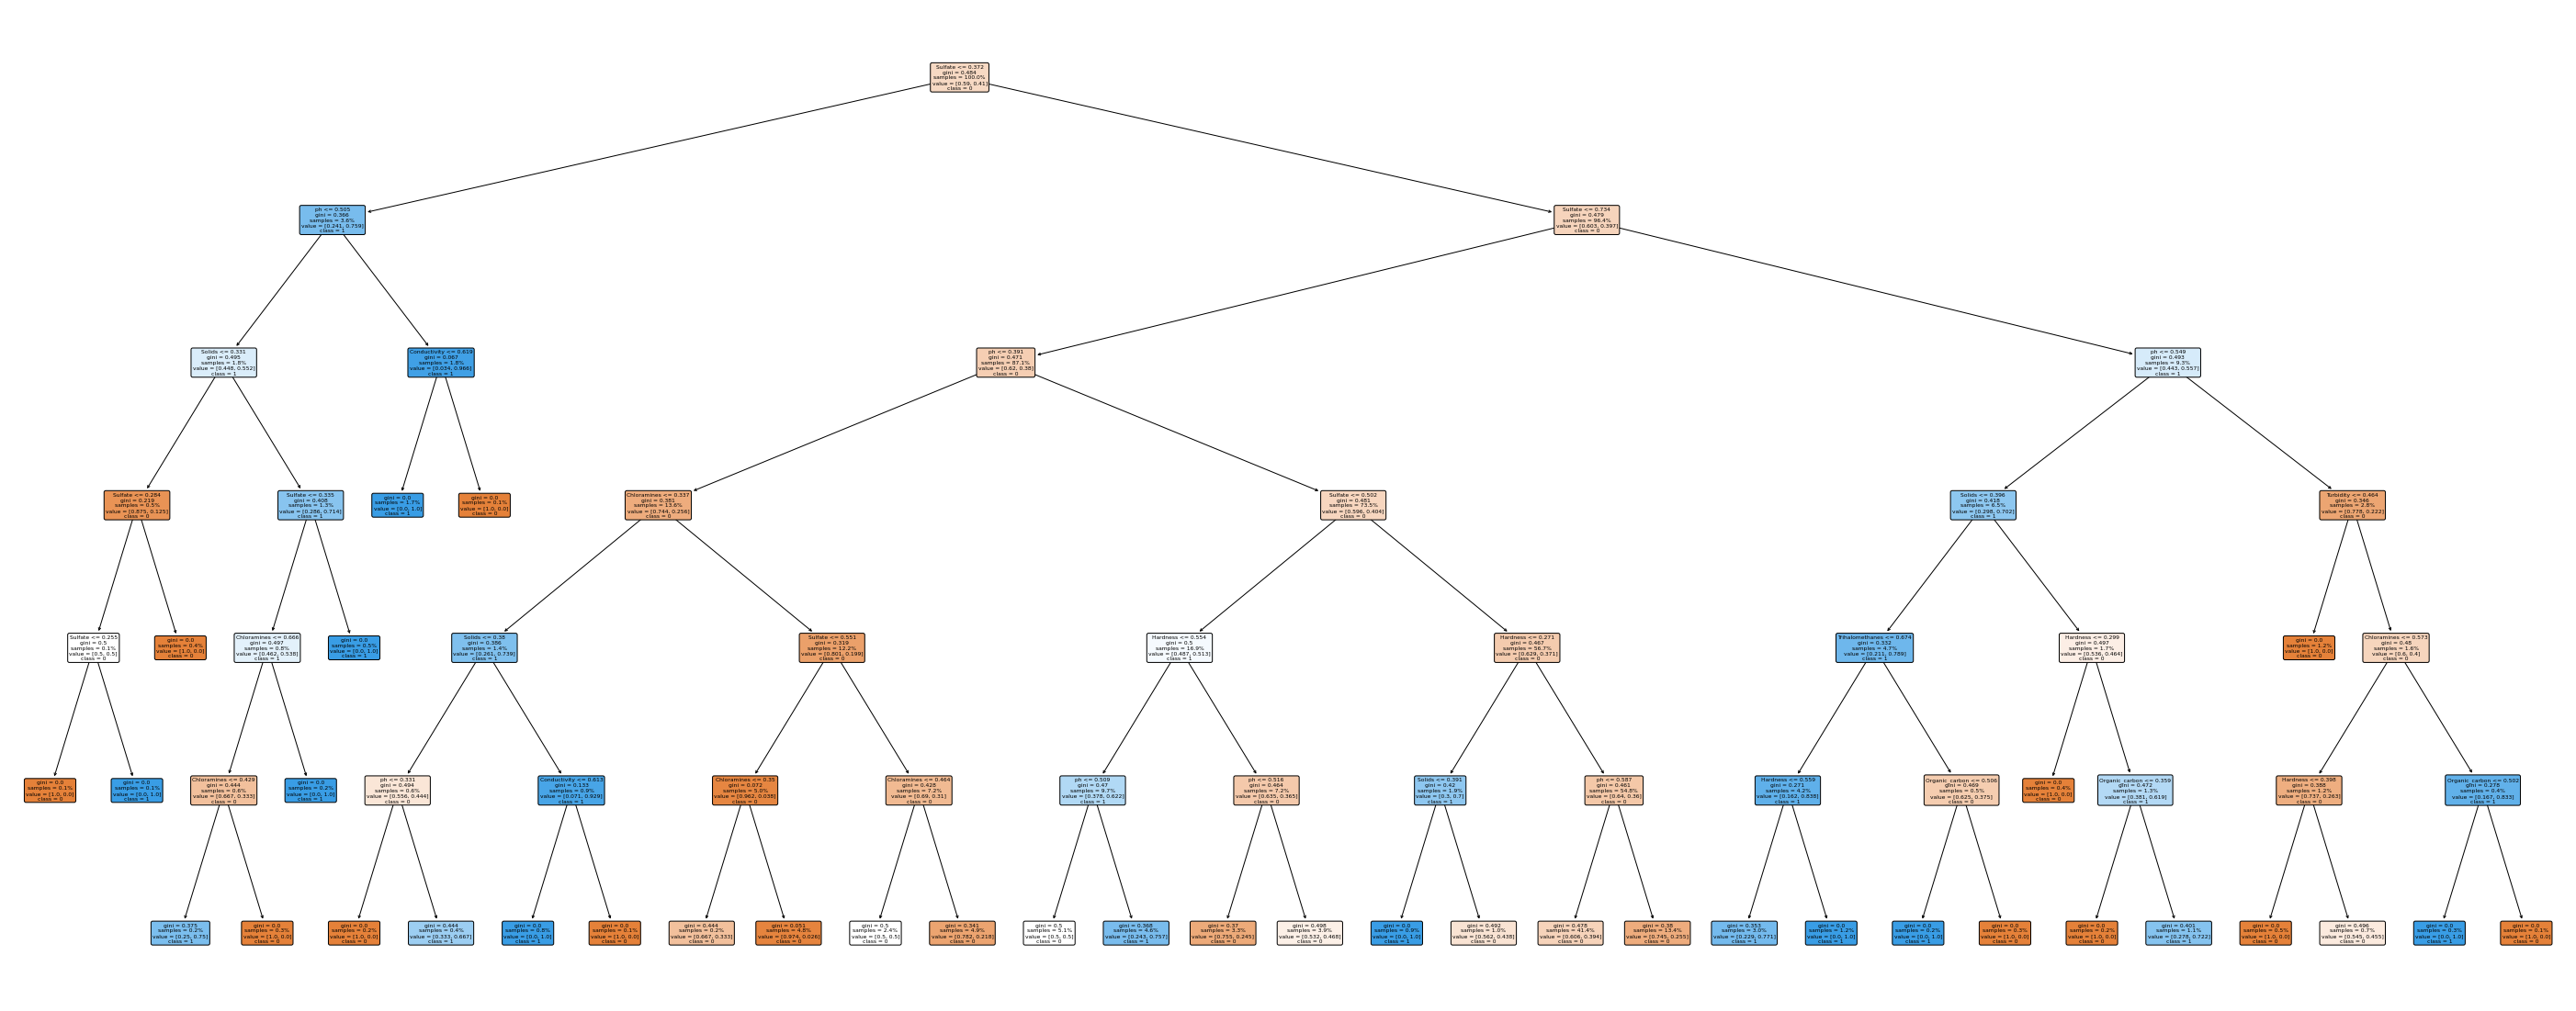

In [ ]:
Plot_tree_func(clf)

## 🛠️ Regularizando o valor de 𝛼 utilizando o algoritmo de Minimal Cost-Complexity

In [ ]:
#Recupera os valores efetivos de alpha para a elaboração da fase de prunning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
#Construindo uma lista de DecisionTreeClassifier com os valores de alfa efetivos
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

#Descarta o último por ser trivial (apenas o nó raiz)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]

index_best_alpha = train_scores.index(max(train_scores))
best_tree_alpha = clfs[index_best_alpha]

#Calculando e exibindo as métricas
print('Ein: %0.4f' % (1 - accuracy_score(y_train, best_tree_alpha.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, best_tree_alpha.predict(X_test))))
print(classification_report(y_test, best_tree_alpha.predict(X_test)))

Ein: 0.0000
Eout: 0.3821
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       252
           1       0.49      0.49      0.49       151

    accuracy                           0.62       403
   macro avg       0.59      0.59      0.59       403
weighted avg       0.62      0.62      0.62       403



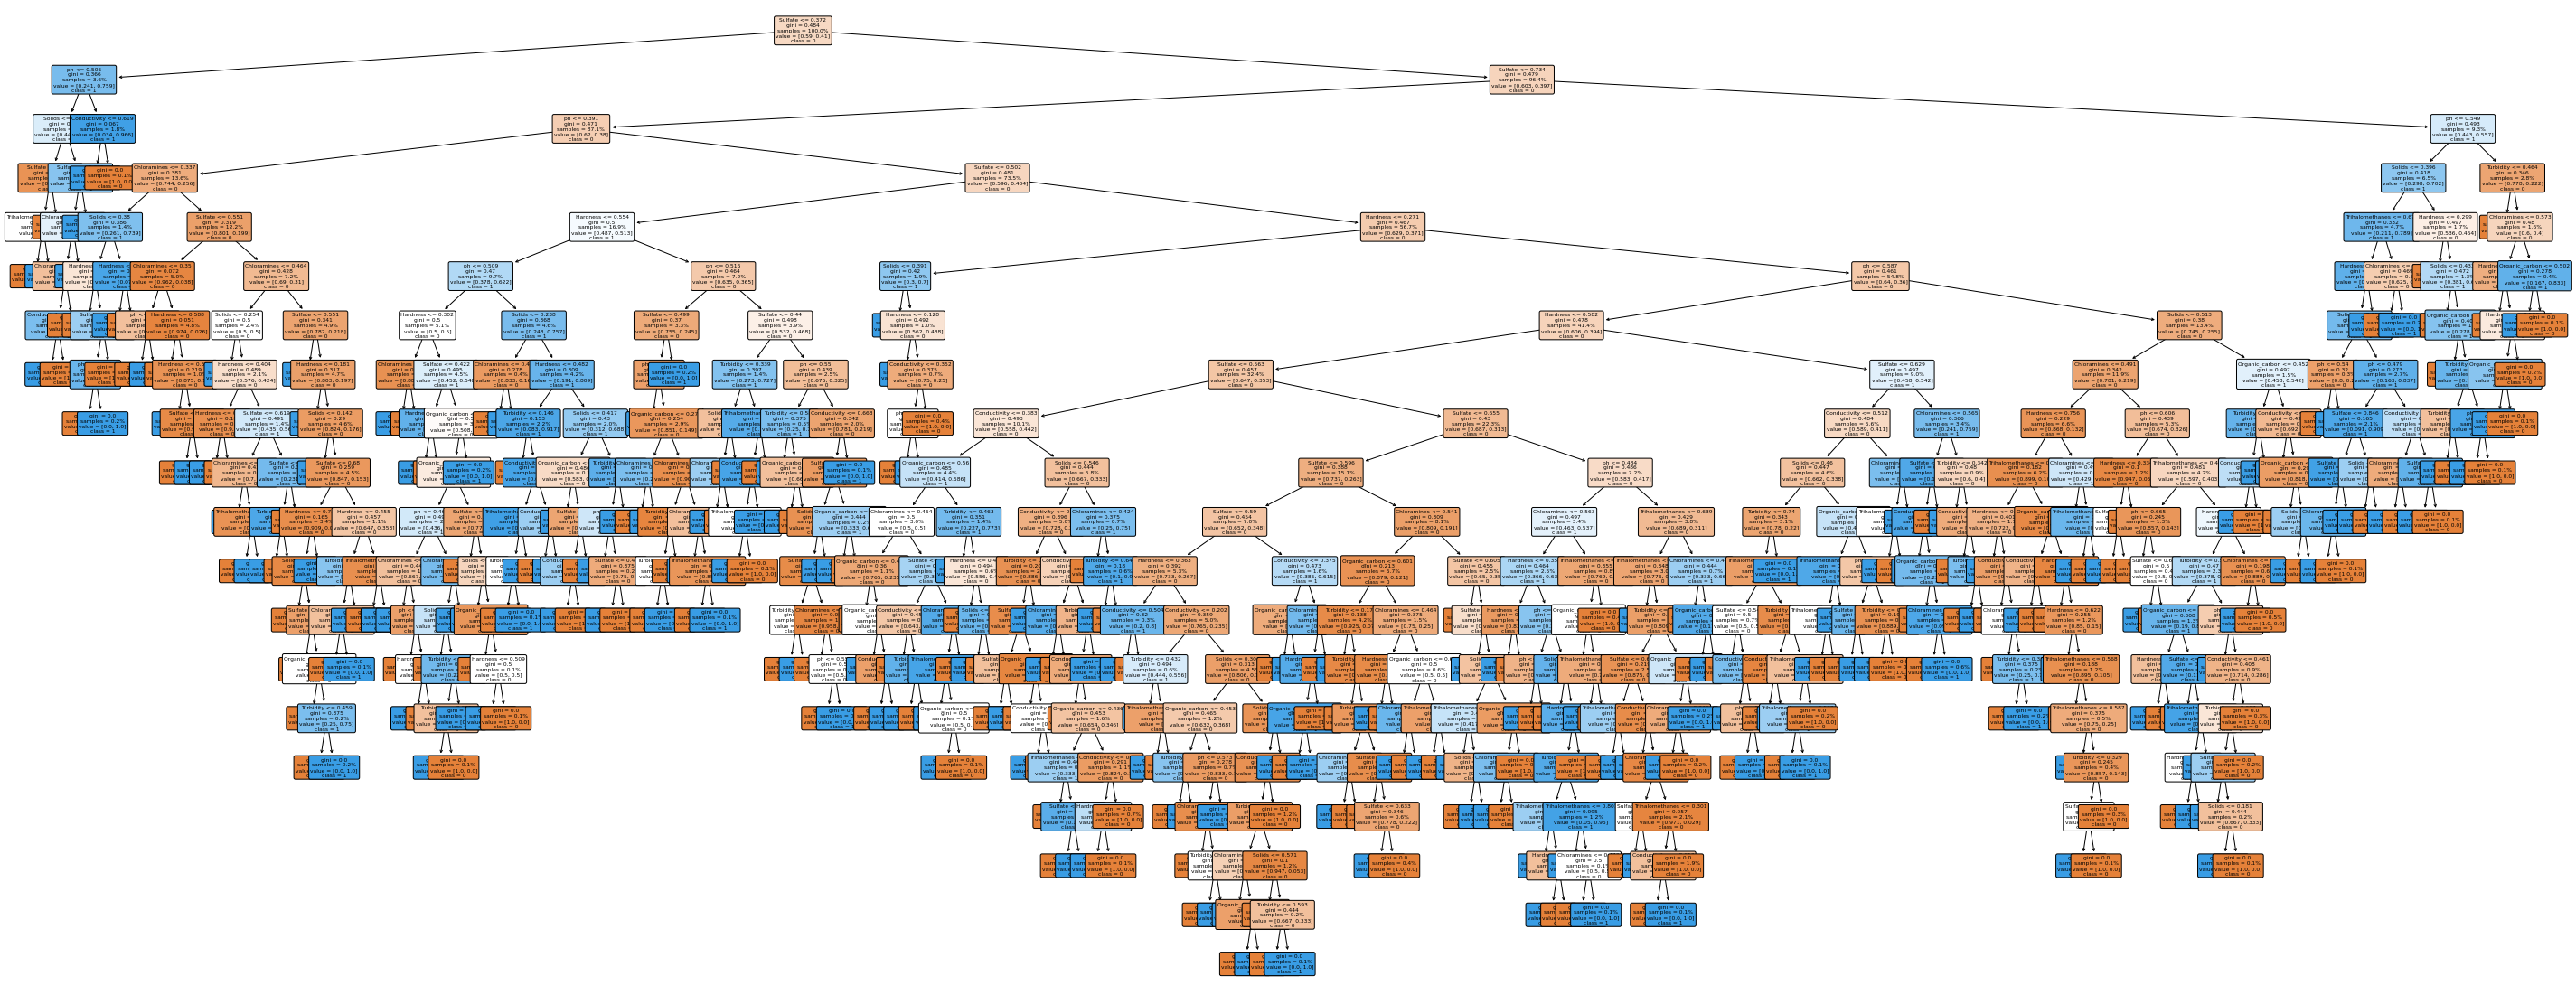

In [ ]:
Plot_tree_func(best_tree_alpha)

## 🛠️Regularizando o valor de 𝛼 utilizando o algoritmo de Minimal Cost-Complexity usando cross validation


In [ ]:
# Utilizando GridSearch com cross validation para parametrizar Alfa

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)

param_grid = {'ccp_alpha': path.ccp_alphas}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 5, verbose=2, n_jobs=-1)
CV_clf.fit(X_train, y_train)

best_clf = CV_clf.best_estimator_

print('Ein: %0.4f' % (1 - accuracy_score(y_train, best_clf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, best_clf.predict(X_test))))
print(classification_report(y_test, best_clf.predict(X_test)))

Fitting 5 folds for each of 191 candidates, totalling 955 fits
Ein: 0.3085
Eout: 0.3474
              precision    recall  f1-score   support

           0       0.68      0.84      0.75       252
           1       0.56      0.34      0.43       151

    accuracy                           0.65       403
   macro avg       0.62      0.59      0.59       403
weighted avg       0.64      0.65      0.63       403



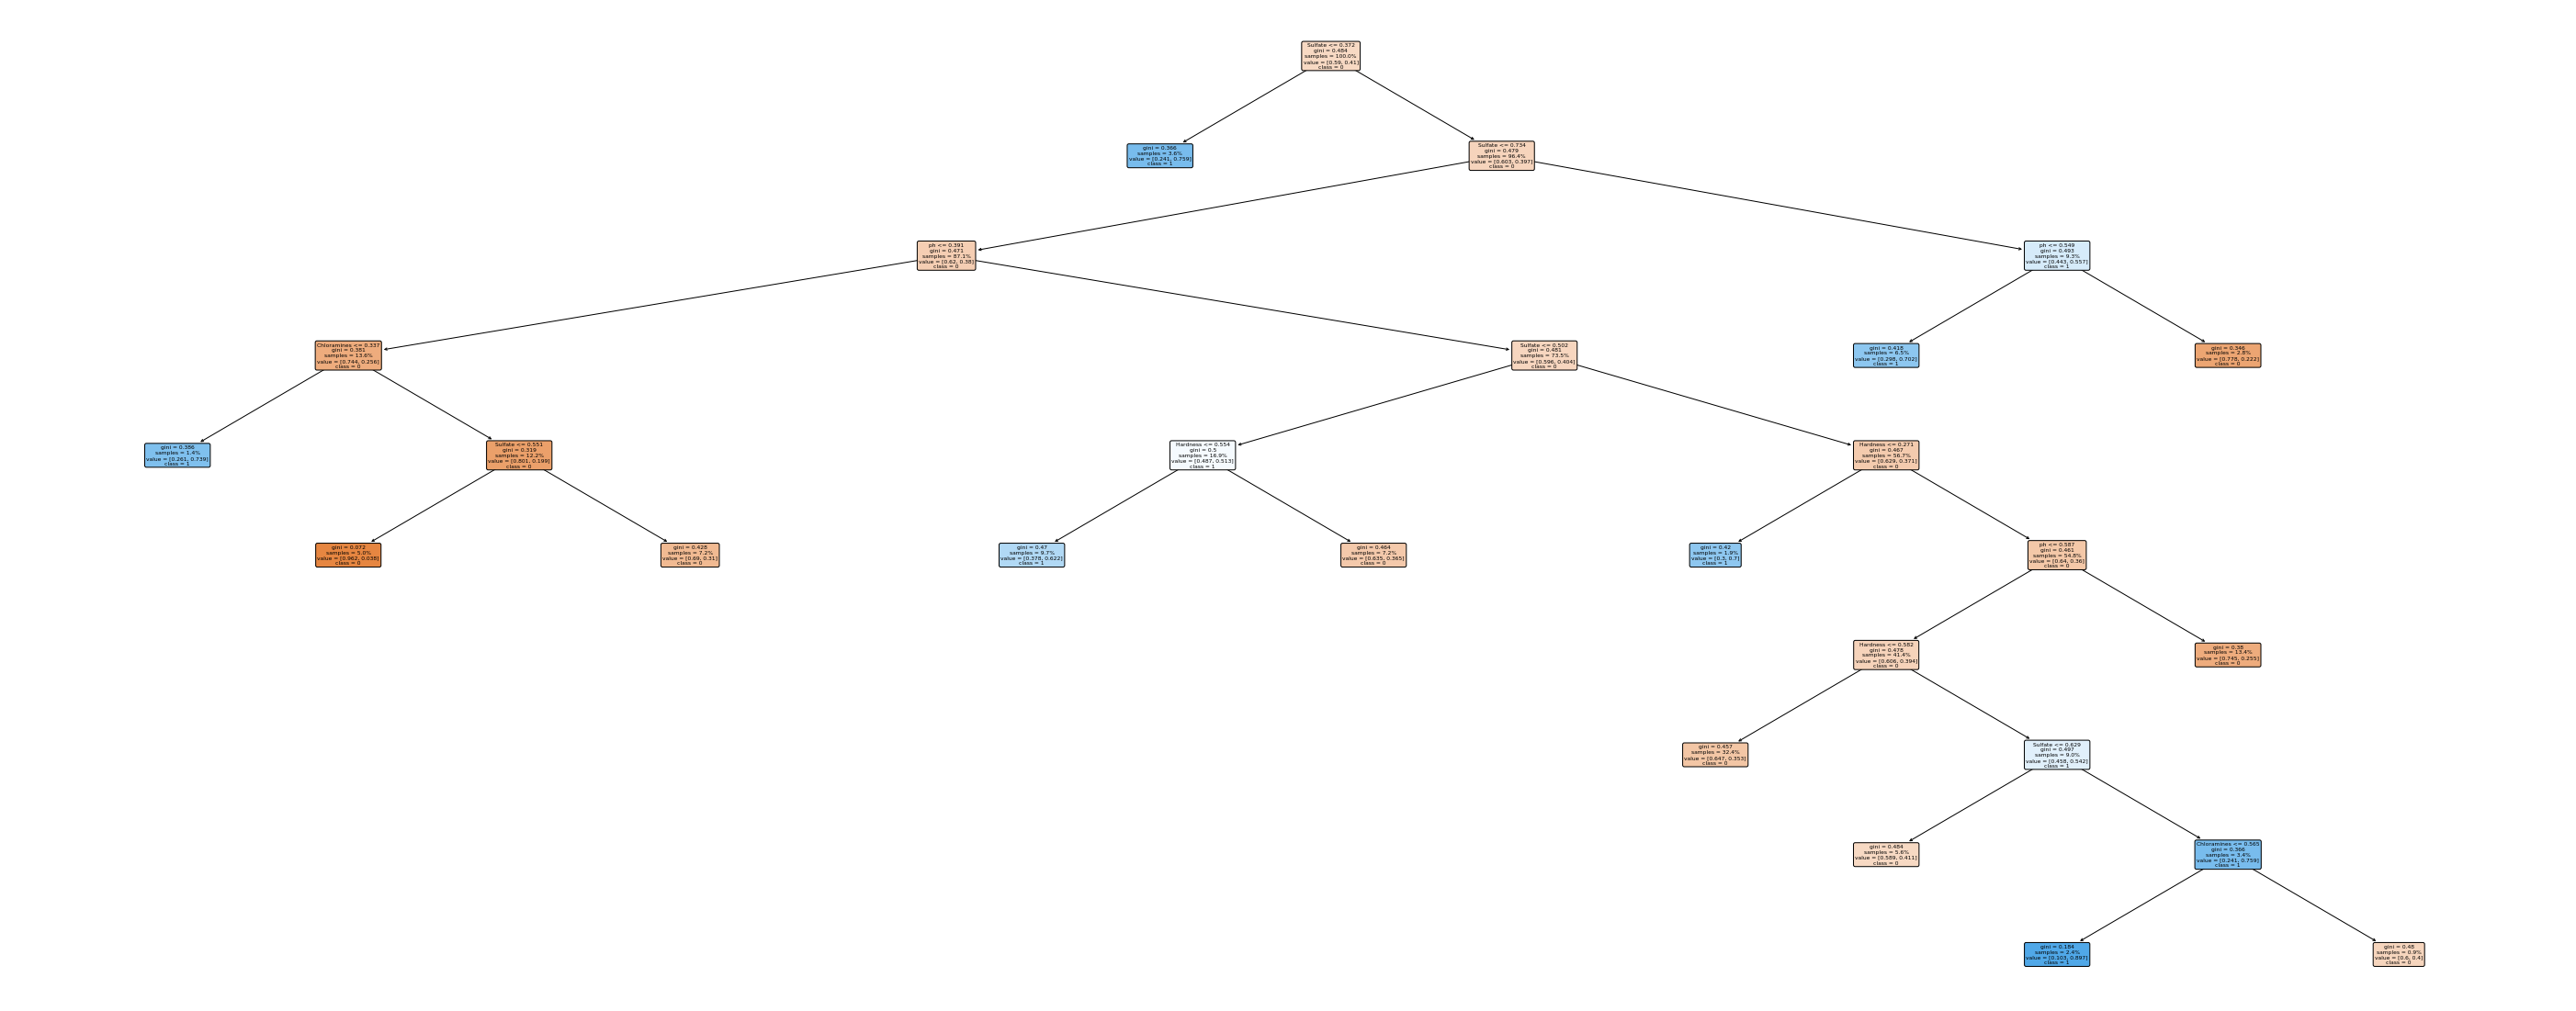

In [ ]:
Plot_tree_func(best_clf)

## 🌱🔃 Random Florest

In [ ]:
Clf_RF = RandomForestClassifier(random_state=0)
Clf_RF.fit(X_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train, Clf_RF.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, Clf_RF.predict(X_test))))
print(classification_report(y_test, Clf_RF.predict(X_test)))

<ipython-input-25-8ac48d49a225>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Clf_RF.fit(X_train, y_train)


Ein: 0.0000
Eout: 0.2779
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       252
           1       0.72      0.42      0.53       151

    accuracy                           0.72       403
   macro avg       0.72      0.66      0.67       403
weighted avg       0.72      0.72      0.70       403



# 📉SVM📈

In [ ]:
svm_ = svm.SVC(kernel='rbf')

# Create the random grid
param_grid = {
              'C' : np.linspace(1,1,20),
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5] 
              }

CV_rf = GridSearchCV(estimator=svm_, param_grid=param_grid, cv = 5, verbose=2, n_jobs=-1)


# Fit the random search model
CV_rf.fit(X_train, y_train)

print(CV_rf.best_estimator_)
print('Melhores parâmetros: ',CV_rf.best_params_)


print('Ein: %0.4f' % (1 - accuracy_score(y_train, CV_rf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, CV_rf.predict(X_test))))
print(classification_report(y_test, CV_rf.predict(X_test)))

Fitting 5 folds for each of 160 candidates, totalling 800 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.5)
Melhores parâmetros:  {'C': 1.0, 'gamma': 0.5}
Ein: 0.4086
Eout: 0.3747
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       252
           1       0.50      0.01      0.01       151

    accuracy                           0.63       403
   macro avg       0.56      0.50      0.39       403
weighted avg       0.58      0.63      0.49       403



Ao observar Ein e Eout e a baixa acurácia, percebemos um nítido underfitting. Uma vez que, valores pequenos para Gamma aumentam a influência dos pontos mais distantes e flexibilizam a região de separação, permitindo alguns erros de classificação e podendo levar ao underfitting.

Aumentando valores de Gamma

In [ ]:
svm_ = svm.SVC(kernel='rbf')

# Create the random grid
param_grid = {
              'C' : np.linspace(1,1,20),
              'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
              }

CV_rf = GridSearchCV(estimator=svm_, param_grid=param_grid, cv = 5, verbose=2, n_jobs=-1)


# Fit the random search model
CV_rf.fit(X_train, y_train)

print(CV_rf.best_estimator_)
print('Melhores parâmetros: ',CV_rf.best_params_)


print('Ein: %0.4f' % (1 - accuracy_score(y_train, CV_rf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, CV_rf.predict(X_test))))
print(classification_report(y_test, CV_rf.predict(X_test)))

Fitting 5 folds for each of 140 candidates, totalling 700 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=5)
Melhores parâmetros:  {'C': 1.0, 'gamma': 5}
Ein: 0.2631
Eout: 0.2854
              precision    recall  f1-score   support

           0       0.71      0.93      0.80       252
           1       0.76      0.35      0.48       151

    accuracy                           0.71       403
   macro avg       0.73      0.64      0.64       403
weighted avg       0.72      0.71      0.68       403



Ao aumentar os valores de Gamma, obtivemos uma melhora acurácia. Porém,valores altos para Gamma podem causar overfitting, pois faz com que os pontos mais distantes da região de separação entre classes sejam desconsiderados, levando a fronteiras de decisão mais restritas e complexas (overfitting).

Reduzindos os valores de Gamma

In [ ]:
svm_ = svm.SVC(kernel='rbf')

# Create the random grid
param_grid = {
              'C' : np.linspace(1,1,5),
              'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5] 
              }

CV_rf = GridSearchCV(estimator=svm_, param_grid=param_grid, cv = 5, verbose=2, n_jobs=-1)


# Fit the random search model
CV_rf.fit(X_train, y_train)

print(CV_rf.best_estimator_)
print('Melhores parâmetros: ',CV_rf.best_params_)


print('Ein: %0.4f' % (1 - accuracy_score(y_train, CV_rf.predict(X_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, CV_rf.predict(X_test))))
print(classification_report(y_test, CV_rf.predict(X_test)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=5)
Melhores parâmetros:  {'C': 1.0, 'gamma': 5}
Ein: 0.2631
Eout: 0.2854
              precision    recall  f1-score   support

           0       0.71      0.93      0.80       252
           1       0.76      0.35      0.48       151

    accuracy                           0.71       403
   macro avg       0.73      0.64      0.64       403
weighted avg       0.72      0.71      0.68       403



Agora obtivemos um resultado semelhante e sem a presença de overfitting ou underfitting.

# 🧠Artificial Neural Networks

### Cálculos para parametrização

Uma ou duas camadas escondidas são
suficientes para a maioria dos problemas.
Se houver a necessidade de mais camadas,
técnicas de redes neurais profundas devem
ser utilizadas. Assim, vamos considerar inicialmente apenas 1 camada.

Sabendo quantas camadas a rede deve ter, podemos calcular o números de neuronios para cada camada, utilizando a seguinte fórmula:



In [ ]:
# calculo o número de neuronios para cada camada
def qnt_neuro(qnt_ex,d):
  n = (qnt_ex - 10) / (10*(d+2))
  return int(n)

In [ ]:
qnt_ex = X_train.shape[0]
d = X_train.shape[1]

In [ ]:
qnt_neuro = qnt_neuro(qnt_ex,d)
print(qnt_neuro) 

14


Agora vamos calcular a dimensão VC, que para rede neural consiste aproximadamente no número de pesos da rede, nesse caso:

In [ ]:
def dVC(qnt_neuro,d):
  return (qnt_neuro * (d + 1)) + (d + 1)

In [ ]:
dVC = dVC(qnt_neuro,d)
print(dVC)

150


Agora vamos calcular se a quantidade de exemplos que temos é o suficiente para generalização do aprendidado utilizando a regra de ouro:

In [ ]:
def regra_ouro(dVC):
  return 10*dVC

In [ ]:
print("Quantidade de exemplos para treino que temos: ",qnt_ex)
print("Quantidade de exemplos para treino que precisamos: ",regra_ouro(dVC))

Quantidade de exemplos para treino que temos:  1608
Quantidade de exemplos para treino que precisamos:  1500


### Modelo

A arquitetura escolhida iria ser 11 neuronios em camada única por causa do número de exemplos passados o objetivo era ter 120 parametros no modelo por conta da regra de ouro.

In [ ]:
# Criando a arquitetura da rede neural
model = Sequential()

# Rede configurada a partir de informações da dimensão VC e da regra de ouro
model.add(Dense(14, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Instanciação e configuração de otimizadores
sgd = optimizers.SGD(learning_rate=0.01)
adam = optimizers.Adam(learning_rate=0.01)

# Compila o modelo. O otimizador escolhido foi o Adam com os parâmetros default
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                140       
                                                                 
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________
None


Treinando a rede neural

In [ ]:
history = model.fit(X_train, y_train,validation_split=0.2, epochs=100, batch_size=32)

Epoch 1/100
41/41 [==============================] - 1s 9ms/step - loss: 0.6915 - accuracy: 0.5630 - val_loss: 0.6879 - val_accuracy: 0.6056
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5855 - val_loss: 0.6811 - val_accuracy: 0.6056
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6816 - accuracy: 0.5855 - val_loss: 0.6751 - val_accuracy: 0.6056
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5855 - val_loss: 0.6726 - val_accuracy: 0.6056
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.5855 - val_loss: 0.6719 - val_accuracy: 0.6056
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.5855 - val_loss: 0.6719 - val_accuracy: 0.6056
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.5855 - val_loss: 0.6714 - val_accuracy: 0.6056
Epoch 8/100
4

Performance do modelo

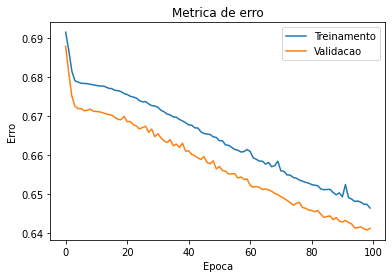

51/51 [==============================] - 0s 1ms/step
--> Acuracia (treino): 0.6437
13/13 [==============================] - 0s 2ms/step
--> Acuracia (teste): 0.6600


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
print(f'--> Acuracia (treino): {accuracy_score(y_train, pred):.4f}')

pred = np.round(model.predict(X_test))
print(f'--> Acuracia (teste): {accuracy_score(y_test, pred):.4f}')

Olhando para o Ein e Eout, podemos desconfiar de um underfitting

Vamos extrapolar um pouco o modelo para investivar:

### Modelo extrapolado(titulo de curiosidade para verificar underfitting)

In [ ]:
# Criando a arquitetura da rede neural
model = Sequential()

# Rede configurada a partir de informações da dimensão VC e da regra de ouro
model.add(Dense(20, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compila o modelo. O otimizador escolhido foi o Adam com os parâmetros default
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                200       
                                                                 
 dense_3 (Dense)             (None, 30)                630       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,791
Trainable params: 1,791
Non-trainable params: 0
_________________________________________________________________
None


Usando validação para verificar se há overfitting

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs=300, batch_size=32)

Epoch 1/300
41/41 [==============================] - 1s 9ms/step - loss: 0.6903 - accuracy: 0.5809 - val_loss: 0.6841 - val_accuracy: 0.6056
Epoch 2/300
41/41 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5855 - val_loss: 0.6738 - val_accuracy: 0.6056
Epoch 3/300
41/41 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.5855 - val_loss: 0.6713 - val_accuracy: 0.6056
Epoch 4/300
41/41 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5855 - val_loss: 0.6720 - val_accuracy: 0.6056
Epoch 5/300
41/41 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5855 - val_loss: 0.6717 - val_accuracy: 0.6056
Epoch 6/300
41/41 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5855 - val_loss: 0.6721 - val_accuracy: 0.6056
Epoch 7/300
41/41 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.5855 - val_loss: 0.6713 - val_accuracy: 0.6056
Epoch 8/300
4

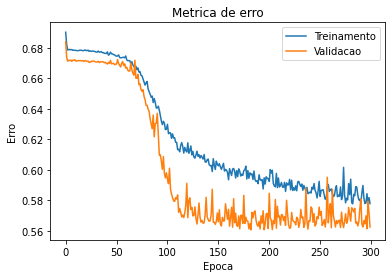

51/51 [==============================] - 0s 2ms/step
--> Acuracia (treino): 0.6984
13/13 [==============================] - 0s 2ms/step
--> Acuracia (teste): 0.6923


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
print(f'--> Acuracia (treino): {accuracy_score(y_train, pred):.4f}')

pred = np.round(model.predict(X_test))
print(f'--> Acuracia (teste): {accuracy_score(y_test, pred):.4f}')

Analisando o gráfico e o Ein e Eout comprovamos o underfitting do modelo anterior

### Modelo reparametrizado

In [ ]:
# Criando a arquitetura da rede neural
model = Sequential()

# Rede configurada a partir de informações da dimensão VC e da regra de ouro
model.add(Dense(35, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))


es = EarlyStopping(monitor='val_binary_accuracy', mode='max', verbose=1, patience=50, restore_best_weights=True)

# Compila o modelo. O otimizador escolhido foi o Adam com os parâmetros default
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 35)                350       
                                                                 
 dense_7 (Dense)             (None, 1)                 36        
                                                                 
Total params: 386
Trainable params: 386
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs=300, batch_size=40)

Epoch 1/300
33/33 [==============================] - 1s 9ms/step - loss: 0.6904 - accuracy: 0.5552 - val_loss: 0.6837 - val_accuracy: 0.6056
Epoch 2/300
33/33 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5855 - val_loss: 0.6756 - val_accuracy: 0.6056
Epoch 3/300
33/33 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5855 - val_loss: 0.6729 - val_accuracy: 0.6056
Epoch 4/300
33/33 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.5855 - val_loss: 0.6718 - val_accuracy: 0.6056
Epoch 5/300
33/33 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.5855 - val_loss: 0.6715 - val_accuracy: 0.6056
Epoch 6/300
33/33 [==============================] - 0s 4ms/step - loss: 0.6788 - accuracy: 0.5855 - val_loss: 0.6716 - val_accuracy: 0.6056
Epoch 7/300
33/33 [==============================] - 0s 5ms/step - loss: 0.6790 - accuracy: 0.5855 - val_loss: 0.6723 - val_accuracy: 0.6056
Epoch 8/300
3

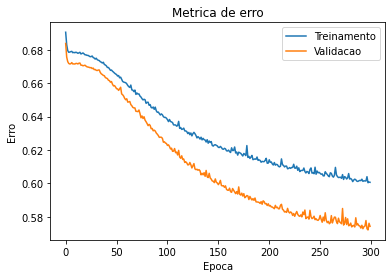

51/51 [==============================] - 0s 1ms/step
--> Acuracia (treino): 0.6959
13/13 [==============================] - 0s 1ms/step
--> Acuracia (teste): 0.6799


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
print(f'--> Acuracia (treino): {accuracy_score(y_train, pred):.4f}')

pred = np.round(model.predict(X_test))
print(f'--> Acuracia (teste): {accuracy_score(y_test, pred):.4f}')

Obtivemos um resultado semelhante ao do modelo estrapolado com menos complexidade de modelo 

Número de neuronios aumentado, batch size aumentado para fugir de mínimos locais.

# 🧐Conclusão

Fica claro que o melhor desempenho foi atingido utilizando SVM, oque provalvelmente se deve ao fato dos dados não estarem totalmente balanceados pois temos amostras da classe "0" despropocional a  da classe "1" no conjunto de treino, sendo assim talvez o próximo passo nessa analise seria balancear os dados e testar novamente, contudo não faz parte do objetivo da disciplina

In [ ]:
y_train.value_counts()

Potability
0             948
1             660
dtype: int64